# Lecture 12 part 2: Plotting in Python

In [3]:
import numpy as np
import matplotlib.pyplot as plt

State-based method, for only one plot

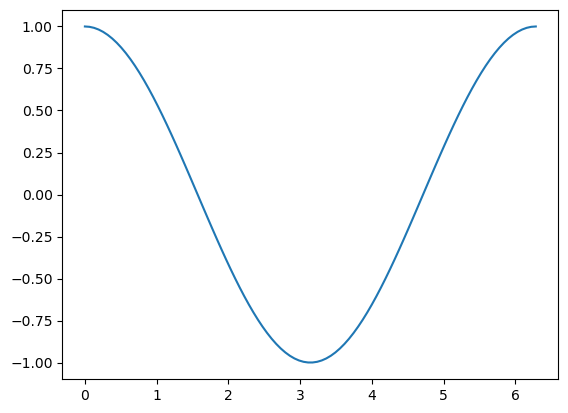

In [4]:
x = np.linspace(0, 2*np.pi, 100)
plt.plot(x, np.cos(x));  #for one plot

Object Oriented Method, for one or more plots. This is much better to use in general!

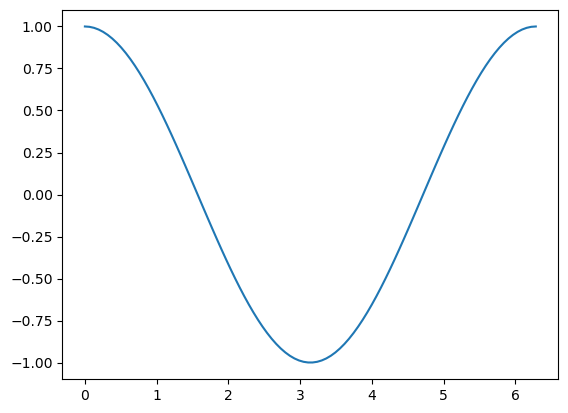

In [7]:
fig, ax = plt.subplots() #ax is the image plotted, while fig is the window for the image.
x = np.linspace(0, 2*np.pi, 100)
ax.plot(x, np.cos(x)); 

## Multiple Plots
**goal:** plot $y = \cos(kx)$ for $k = 1, 2, 3, 5, 7, 10$ between $x=0$ and $x=2\pi$ on single axes and multiple axes

In [13]:
k_list = [1, 2, 3, 5, 7, 10]
x = np.linspace(0, 2*np.pi, 500) #domain

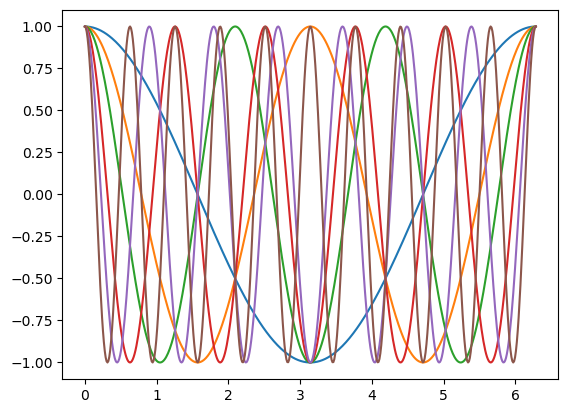

In [15]:
fig, ax = plt.subplots()
for k in k_list:
    f = lambda x: np.cos(k * x)  #lambda function, similar to function handles in Matlab
    y = f(x)
    ax.plot(x,y);

The plot above is very messy! What if we want multiple windows for our plots?

In [25]:
help(plt.subplots)

Help on function subplots in module matplotlib.pyplot:

subplots(nrows: 'int' = 1, ncols: 'int' = 1, *, sharex: "bool | Literal['none', 'all', 'row', 'col']" = False, sharey: "bool | Literal['none', 'all', 'row', 'col']" = False, squeeze: 'bool' = True, width_ratios: 'Sequence[float] | None' = None, height_ratios: 'Sequence[float] | None' = None, subplot_kw: 'dict[str, Any] | None' = None, gridspec_kw: 'dict[str, Any] | None' = None, **fig_kw) -> 'tuple[Figure, Any]'
    Create a figure and a set of subplots.

    This utility wrapper makes it convenient to create common layouts of
    subplots, including the enclosing figure object, in a single call.

    Parameters
    ----------
    nrows, ncols : int, default: 1
        Number of rows/columns of the subplot grid.

    sharex, sharey : bool or {'none', 'all', 'row', 'col'}, default: False
        Controls sharing of properties among x (*sharex*) or y (*sharey*)
        axes:

        - True or 'all': x- or y-axis will be shared amon

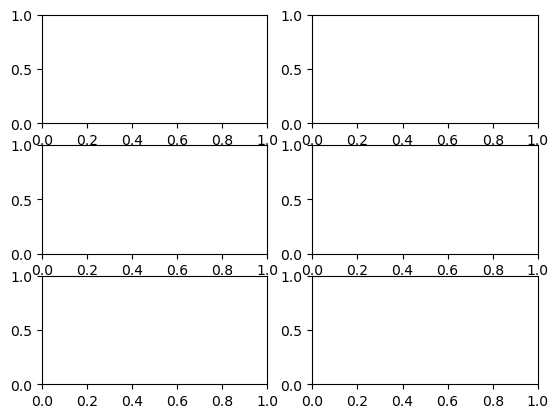

In [17]:
fig, axs = plt.subplots(3,2)

In [19]:
type(axs)

numpy.ndarray

In [31]:
axs.shape

(3, 2)

In [21]:
axs_flat = axs.reshape(-1)  #makes it easier to assign different plots to different figure windows

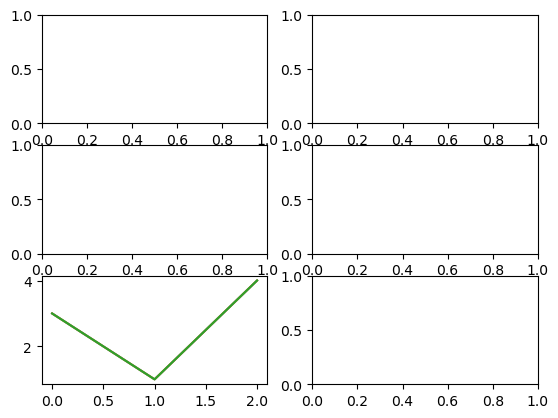

In [27]:
axs_flat[4].plot([3, 1, 4]); #index 4 is the 5th figure window.
fig

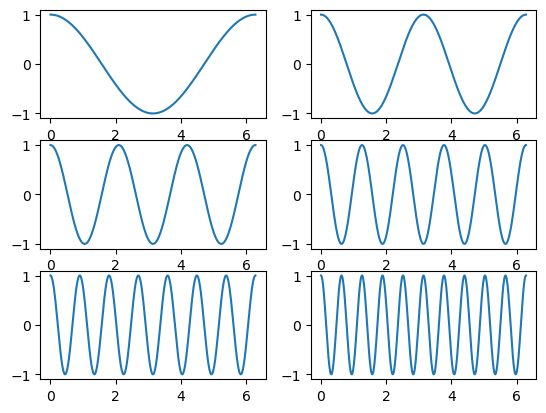

In [29]:
fig, axs = plt.subplots(3, 2)
axs_flat = axs.reshape(-1)

for i in range(len(k_list)):
    k = k_list[i]
    ax = axs_flat[i]
    f = lambda x: np.cos(k * x)
    y = f(x)
    ax.plot(x,y);

**goal:** see two methods to clean up this code a bit

Method 1: For loop on an enumerate object

In [31]:
k_list

[1, 2, 3, 5, 7, 10]

In [33]:
for i, k in enumerate(k_list):
    print(f"i = {i} corresponds to k = {k}")

i = 0 corresponds to k = 1
i = 1 corresponds to k = 2
i = 2 corresponds to k = 3
i = 3 corresponds to k = 5
i = 4 corresponds to k = 7
i = 5 corresponds to k = 10


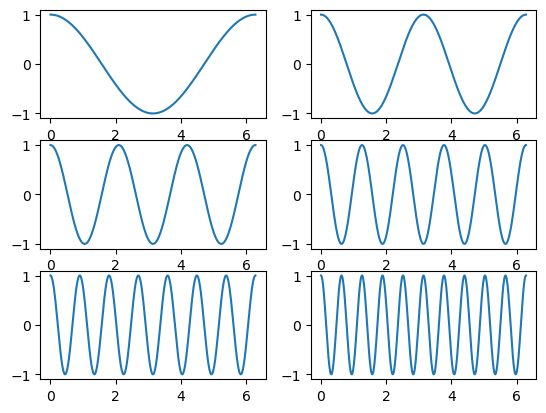

In [35]:
fig, axs = plt.subplots(3, 2)
axs_flat = axs.reshape(-1)

for i, k in enumerate(k_list):
    ax = axs_flat[i]
    f = lambda x: np.cos(k * x)
    y = f(x)
    ax.plot(x,y);

In [37]:
a_list = [7, 8, 9]
b_list = [3, 4, 5]
for a, b in zip(a_list, b_list):
    print(a, b)

7 3
8 4
9 5


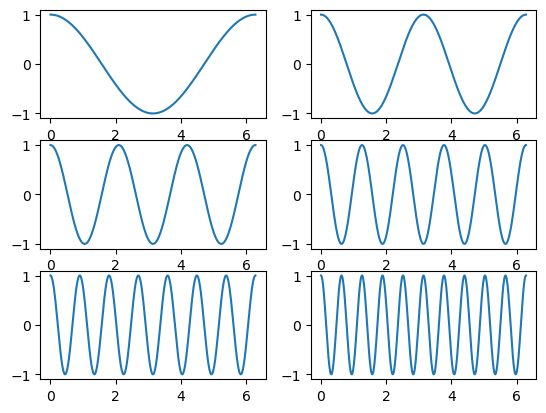

In [39]:
fig, axs = plt.subplots(3, 2)
axs_flat = axs.reshape(-1)

for k, ax in zip(k_list, axs_flat):
    f = lambda x: np.cos(k * x)
    y = f(x)
    ax.plot(x,y);

**To Do:** Please also take a look at the last video in the Matplotlib series "Adjusting the Appearance" to learn more about how to make these graphs look nice: https://www.youtube.com/watch?v=3d8ahlcQhRY

The video linked is by Yasmeen Baki and is well worth your time. The picture below is the result of each adjustment from the video:

In [72]:
from matplotlib.colors import CSS4_COLORS

In [117]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [131]:
plt.style.use("seaborn-v0_8-darkgrid")

In [121]:
rng = np.random.default_rng()

In [123]:
random_colors = rng.choice(list(CSS4_COLORS.keys()), size=len(k_list))

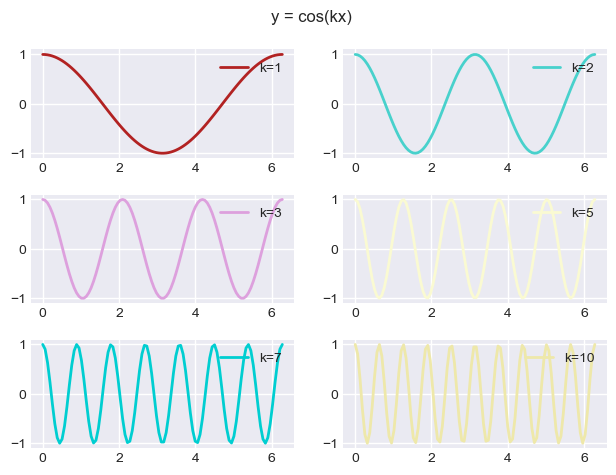

In [133]:
fig, axs = plt.subplots(3, 2)
axs_flat = axs.reshape(-1)
fig.suptitle("y = cos(kx)")
fig.tight_layout() #keeps each subplot from being squished together


for k, ax, color in zip(k_list, axs_flat, random_colors):
    f = lambda x: np.cos(k * x)
    y = f(x)
    ax.plot(x,y, label=f"k={k}", c=color);  #added label for legend
    ax.legend(loc="upper right")   #without this line, the legend will not actually show